In [5]:
from RiotParser import RiotParser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def get_winRate_list(df, parser):

    # The list is represented as follows:
    # winRates[0] : 10 - 15 mins
    # winRates[1] : 15 - 20 mins
    # winRates[2] : 20 - 25 mins
    # winRates[3] : 25 - 30 mins
    # winRates[4] : 30 - 35 mins
    # winRates[5] : 35 - 40 mins
    # winRates[6]: 40+ mins
    winRates = []

    # This is for winrate 0 - 15 mins
    wins = df.loc[(df[parser.GAME_DURATION] >= 0) & 
                    (df[parser.GAME_DURATION] < 60 * 15) &
                    (df[parser.MATCH_RESULT] == 'Victory')].shape[0]
    totalGames = df.loc[(df[parser.GAME_DURATION] >= 0) & 
                         (df[parser.GAME_DURATION] < 60 * 15)].shape[0]

    winrate = int(wins / totalGames * 100)
    winRates.append(winrate)

    # This is for the intervals between 15 and 40 mins
    for i in range(3, 8):
        
        # winrate calculated by wins/total games within a certain timeframe
        wins = df.loc[(df[parser.GAME_DURATION] >= 60 * (i * 5)) &
                       (df[parser.GAME_DURATION] < 60 * ((i + 1) * 5)) &
                       (df[parser.MATCH_RESULT] == 'Victory')].shape[0]
        totalGames = df.loc[(df[parser.GAME_DURATION] >= 60 * (i * 5)) &
                            (df[parser.GAME_DURATION] < 60 * ((i + 1) * 5))].shape[0]

        winrate = int(wins / totalGames * 100)

        winRates.append(winrate)

    # This is for winrate 40+ mins
    wins = df.loc[(df[parser.GAME_DURATION] >= 60 * 40) &
                  (df[parser.MATCH_RESULT] == 'Victory')].shape[0]
    totalGames = df.loc[(df[parser.GAME_DURATION] >= 60 * 40)].shape[0]

    winrate = int(wins / totalGames * 100)
    winRates.append(winrate)

    return winRates


In [6]:
# Reading in the files
df1 = pd.read_csv('Summoner Data\Controleed Freak.csv')
df2 = pd.read_csv('Summoner Data\Ender Dragon 3.csv')
df3 = pd.read_csv('Summoner Data\cyrs7.csv')
df4 = pd.read_csv('Summoner Data\Belox.csv')
df5 = pd.read_csv('Summoner Data\TF Blade.csv')
df6 = pd.read_csv('Summoner Data\Adrian Riven.csv')

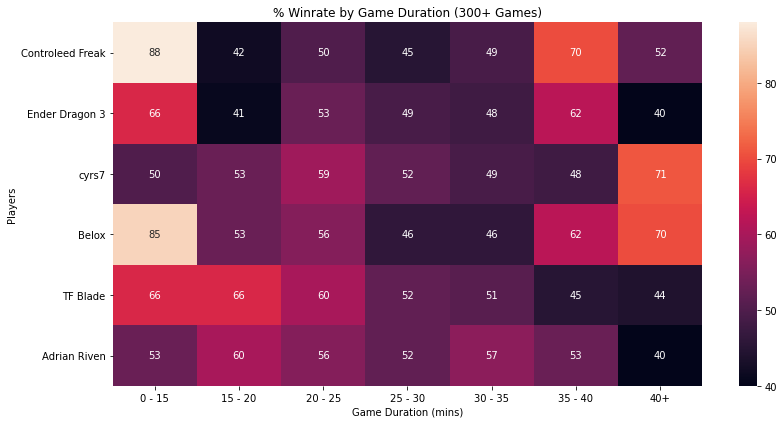

In [7]:
# Axis Labels:
# x-axis: matchtime
# y-axis: players
matchtime = ['0 - 15', '15 - 20', '20 - 25',
             '25 - 30', '30 - 35', '35 - 40',
             '40+']
players = ['Controleed Freak', 'Ender Dragon 3', 'cyrs7', 'Belox', 'TF Blade', 'Adrian Riven']

parser = RiotParser('Controleed Freak')
winrateArray = np.array([get_winRate_list(df1, parser),
                        get_winRate_list(df2, parser),
                        get_winRate_list(df3, parser),
                        get_winRate_list(df4, parser),
                        get_winRate_list(df5, parser),
                        get_winRate_list(df6, parser)])

# Heat map Specifics:
fig, ax = plt.subplots(figsize=(12,6))
sb.heatmap(winrateArray, xticklabels=matchtime, yticklabels=players, annot=True, ax=ax)

plt.xlabel("Game Duration (mins)")
plt.ylabel("Players")

ax.set_title("% Winrate by Game Duration (300+ Games)")
fig.tight_layout()

plt.show()